# TITULO  CUANDO EXISTA

## 1. Problem Statement

We have been hired by the data science team at a renowned consulting firm. We've been assigned to a market research project for a major Chinese automotive company. Our client aims to enter our automobile market, and they have tasked us with analyzing the features of vehicles currently available in the market. With an extensive collection of models across various categories in their catalog, which are stratified into ranges based on regional preferences, they want to understand the characteristics of both high-end and low-end vehicles in our market. This will enable them to cater to a wide range of target audiences, aligning with market demand. Using this data, they also intend to accurately price the vehicles they will offer.

To achieve this, our data department has gathered prices and features of several vehicle models available in our market, along with their retail prices. They have compiled the following data dictionary:

| Variable Name   | Description                                                |
|-----------------|------------------------------------------------------------|
| car_ID          | Vehicle identification number in the database             |
| symboling       | Risk rating associated with the vehicle                   |
| CarName         | Vehicle's brand name                                      |
| fueltype        | Fuel type                                                  |
| aspiration      | Engine aspiration type                                    |
| doornumber      | Number of doors                                           |
| carbody         | Vehicle body type                                         |
| drivewheel      | Driver's wheel location                                   |
| enginelocation  | Engine location in the vehicle                            |
| wheelbase       | Wheelbase distance                                        |
| carlength       | Vehicle length                                            |
| carwidth        | Vehicle width                                             |
| carheight       | Vehicle height without load or occupants                 |
| curbweight      | Curb weight (vehicle weight without occupants or load)   |
| enginetype      | Engine type                                               |
| cylindernumber  | Number of cylinders in the engine                         |
| enginesize      | Engine displacement size                                  |
| fuelsystem      | Fuel system                                               |
| boreratio       | Bore-to-stroke ratio                                      |
| stroke          | Compression stroke ratio within the engine                |
| compressionratio| Compression ratio                                         |
| horsepower      | Vehicle horsepower (HP)                                   |
| peakrpm         | Maximum revolutions per minute supported by the engine   |
| citympg         | City fuel consumption in miles per gallon (MPG)          |
| highwaympg      | Highway fuel consumption in miles per gallon (MPG)       |
| price           | Vehicle price                                             |


Our Data Lead has advised us to thoroughly analyze the data, preprocess it appropriately, and design two predictive models: one for predicting prices and another for distinguishing between high-end and low-end vehicles, using the median price as the cutoff point. They would like to receive the prediction outputs in plain text format.

In addition to the detailed data exploration analysis, here are the two possible predictions they are interested in:

Classification Model: Implement a supervised learning classification model to categorize vehicle prices as either "affordable" or "expensive," using the median price as the cutoff point. You should utilize the provided data for this task.

Regression Model: Implement a supervised learning regression model to predict the final price of vehicles. You should use the provided data for this prediction task.

Both prediction outputs should be provided in plain text format.

## 2. Exploratory Data Analysis

### 2.1 Data loading

In [1]:
# Libraries Used in the Document
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'./ML_cars.csv', index_col=False)
df.head(3)

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  

[3 rows x 26 columns]

### 2.2 Basic Analysis

In [2]:
description_dataframe = df.describe(include='all')
print(description_dataframe)

            car_ID   symboling        CarName fueltype aspiration doornumber  \
count   205.000000  205.000000            205      205        205        205   
unique         NaN         NaN            147        2          2          2   
top            NaN         NaN  toyota corona      gas        std       four   
freq           NaN         NaN              6      185        168        115   
mean    103.000000    0.834146            NaN      NaN        NaN        NaN   
std      59.322565    1.245307            NaN      NaN        NaN        NaN   
min       1.000000   -2.000000            NaN      NaN        NaN        NaN   
25%      52.000000    0.000000            NaN      NaN        NaN        NaN   
50%     103.000000    1.000000            NaN      NaN        NaN        NaN   
75%     154.000000    2.000000            NaN      NaN        NaN        NaN   
max     205.000000    3.000000            NaN      NaN        NaN        NaN   

       carbody drivewheel enginelocatio

In [3]:
# Review of Null Data
null_dataframe = df.isnull().sum()
display(null_dataframe)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

__We can observe that the information is complete, and there is no need for variable imputation.__

### 2.3 Creating a Column to Differentiate Whether a Car is Expensive or Affordable

In [4]:
# Calculate the median of the prices
price_median = df['price'].median()
print(price_median)

# New column 'price_category' indicating whether a car is in the low or high price range
df['price_category'] = df['price'].apply(lambda x: 'Low Range' if x <= price_median else 'High Range')

# Displaying the firsts few rows of the DataFrame to verify the results
df[['price','price_category']].loc[40:45]


10295.0


price price_category
40  10295.0      Low Range
41  12945.0     High Range
42  10345.0     High Range
43   6785.0      Low Range
44   8916.5      Low Range
45   8916.5      Low Range

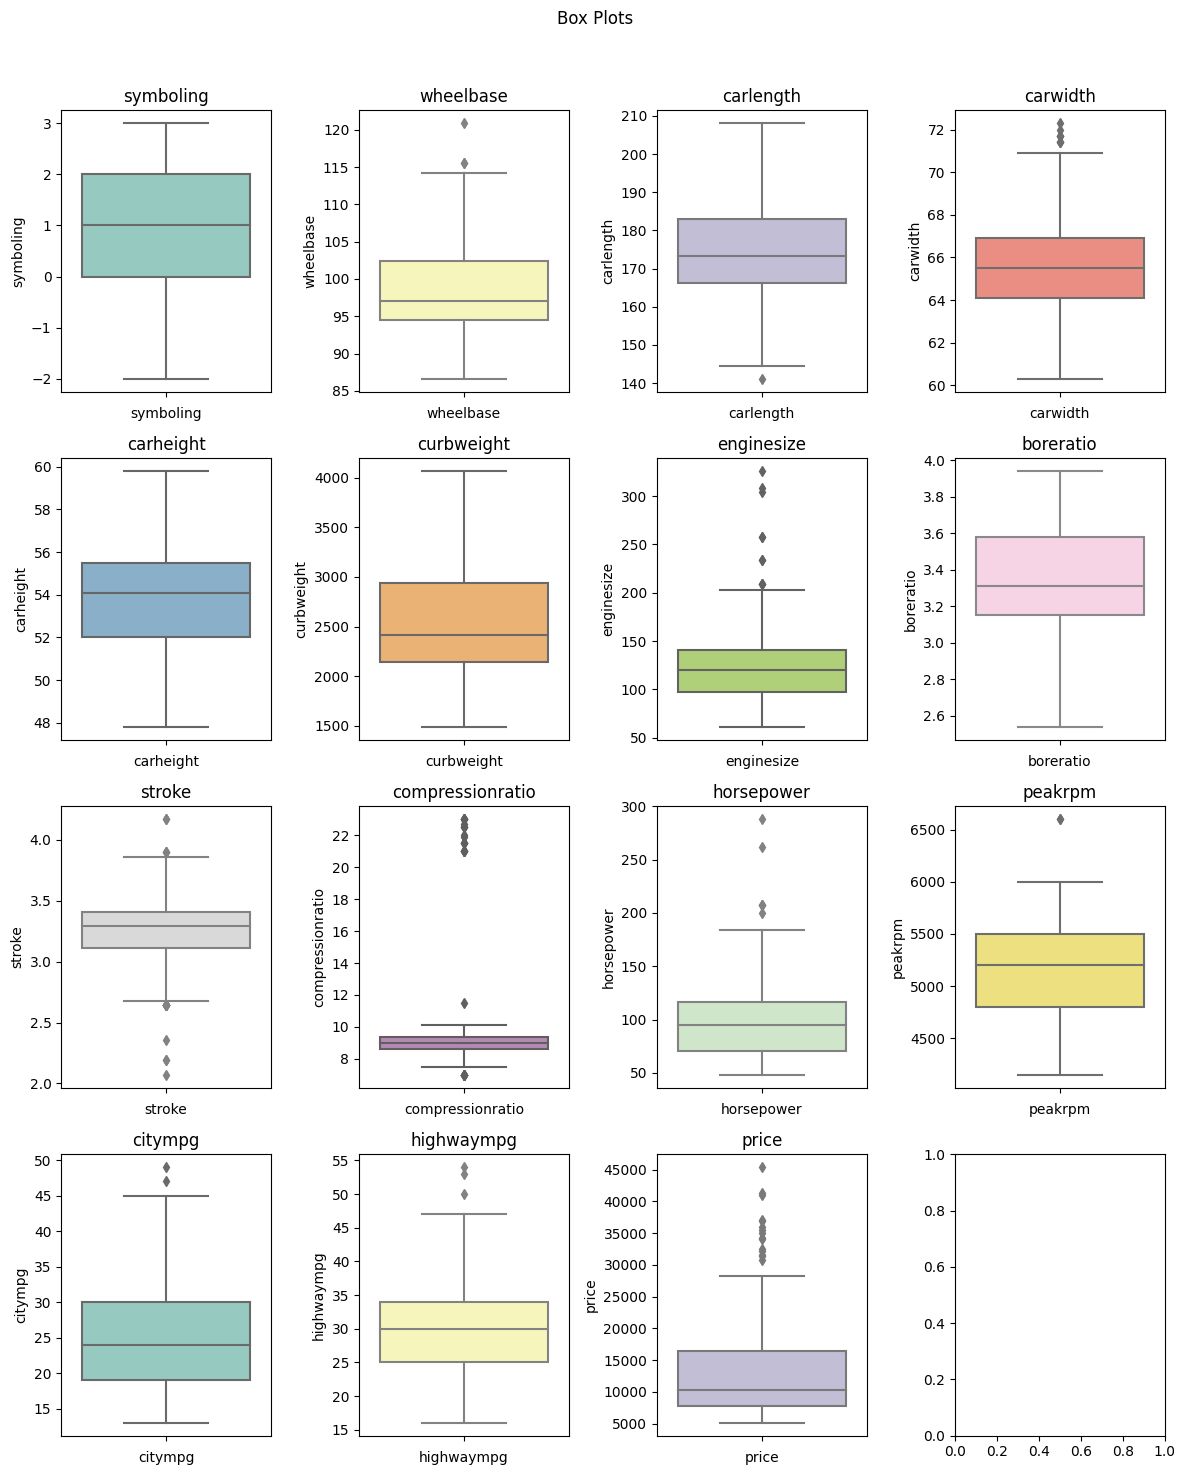

In [14]:
def plot_boxplots(df):
    numerical_features = ['symboling', 'wheelbase', 'carlength','carwidth','carheight','curbweight',
                          'enginesize','boreratio','stroke','compressionratio','horsepower',
                          'peakrpm','citympg','highwaympg','price']
    colors = sns.color_palette("Set3", n_colors=len(numerical_features))
    fig, axes = plt.subplots(4, 4, figsize=(12, 15))
    fig.suptitle('Box Plots')
    axes = axes.flatten()
    for i, feature in enumerate(numerical_features):
        sns.boxplot(y=feature, data=df, ax=axes[i], palette=[colors[i]])  # Usar el color correspondiente
        axes[i].set_title(feature)
        axes[i].set_xlabel(feature)
        
    # Remover el ultimo plot que no es utilizado
    fig.delaxes(axes[-1])
    plt.tight_layout(rect=[0, 0, 1, 0.96])

# Plot de gráficos de caja
plot_boxplots(df)
plt.show()




d:\Proyectos\Data Science\Automoviles_ML\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


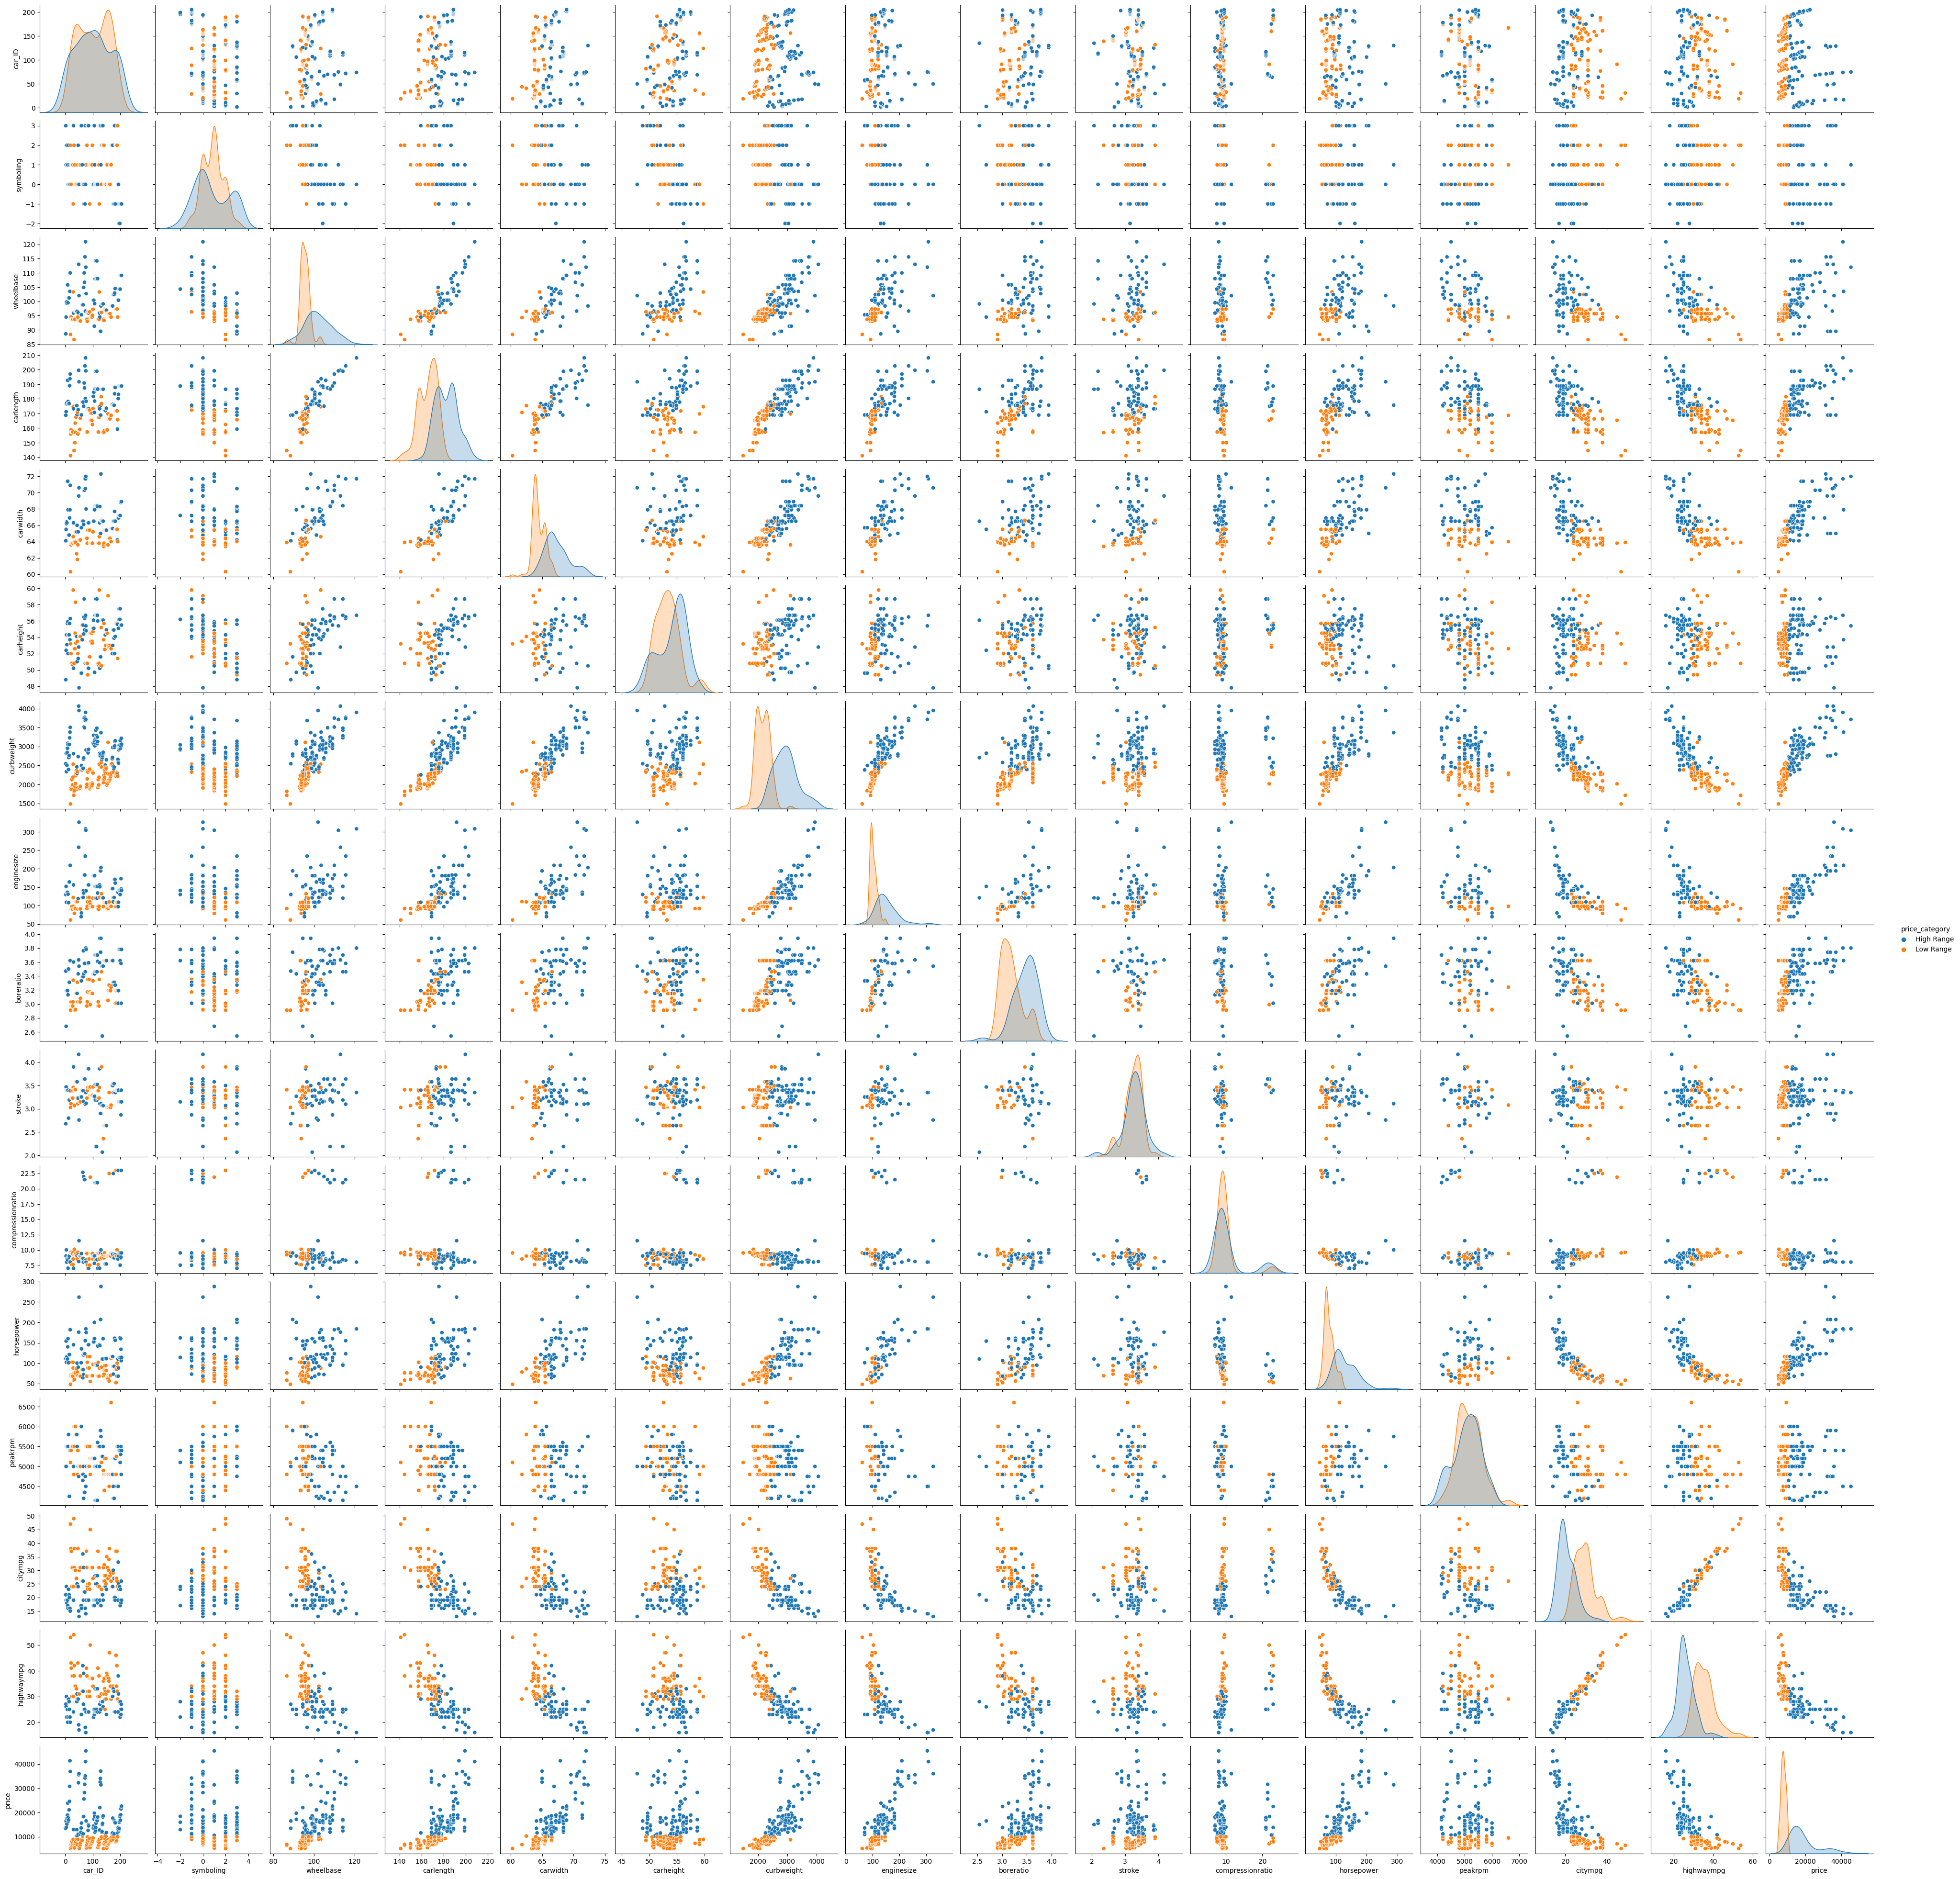

In [7]:
sns.pairplot(df, hue = 'price_category')
plt.show()